# questions
- transforms이 dataloader에서 모델로 넘겨줄 때 발생하는가??
- transform이 실제 이미지보다 큰데 crop이 어떻게 작동하는 건가???

In [1]:
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import easydict
from PIL import Image
import os

In [2]:
opt = easydict.EasyDict({
     "dataset": 'cifar100',
     "dataroot": './',
     "workers": 2,
     "batchSize":64, 
     "imageSize": 80,   # 720p의 이미지 크기를 알아내서 쓰면 될 듯
                        # low resolution image size
     "upSampling": 3,   # low to high scailing factor
     "nEpochs": 100, 
     "generatorLR": 0.0001, 
     "discriminatorLR": 0.0001,
     "cuda": 'store_true',
     "nGPU": 1,
     "generatorWeights": '',
     "discriminatorWeights": '',
     "out":'./'       
     })

In [3]:
transform = transforms.Compose([transforms.RandomCrop(opt.imageSize*opt.upSampling), # imagesize에 upSampling 계수를 곱해서 자른다
                                transforms.ToTensor()])

In [4]:
normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                std = [0.229, 0.224, 0.225])

In [5]:
scale = transforms.Compose([transforms.ToPILImage(),
                            transforms.Scale(opt.imageSize),
                            transforms.ToTensor(),
                            transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                std = [0.229, 0.224, 0.225])
                            ])

C:\Anaconda3\lib\site-packages\torchvision\transforms\transforms.py:279: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [19]:
dataset = datasets.CIFAR100(root = opt.dataroot, train=True, download=True, transform=transform)

Extracting ./cifar-100-python.tar.gz to ./


In [6]:
os.mkdir('org')
dataset_org = datasets.CIFAR100(root = './org', train=True, download=True)

Extracting ./org\cifar-100-python.tar.gz to ./org


In [7]:
os.mkdir('sc')
dataset_sc = datasets.CIFAR100(root = './sc', train=True, download=True, transform=scale)

Extracting ./sc\cifar-100-python.tar.gz to ./sc


In [8]:
os.mkdir('cp')
dataset_cp = datasets.CIFAR100(root = './cp', train=True, download=True, transform=transform)

Extracting ./cp\cifar-100-python.tar.gz to ./cp


In [9]:
def geti(tpe,idx):
    if tpe == 'org':
        return dataset_org.__getitem__(idx)
    
    elif tpe == 'sc':
        return dataset_sc.__getitem__(idx)
    
    elif tpe == 'cp':
        return dataset_cp.__getitem__(idx)

In [17]:
geti('org',1)

(<PIL.Image.Image image mode=RGB size=32x32 at 0x2948027B048>, 29)

In [16]:
geti('sc',1)

TypeError: pic should be Tensor or ndarray. Got <class 'PIL.Image.Image'>.

In [18]:
geti('cp',1)

ValueError: Required crop size (240, 240) is larger then input image size (32, 32)

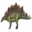

In [63]:
org = dataset_org.data.__getitem__(1)
org = Image.fromarray(x)
org

In [64]:
org.size

(32, 32)

In [65]:
p_img.size

(32, 32)

In [48]:
x = dataset.data.__getitem__(1)

In [51]:

p_img = Image.fromarray(x)

In [57]:
dir(p_img)
# p_img.size

['_Image__transformer',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_new',
 '_repr_png_',
 '_size',
 'alpha_composite',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'draft',
 'effect_spread',
 'encoderconfig',
 'encoderinfo',
 'entropy',
 'filter',
 'format',
 'format_description',
 'frombytes',
 'fromstring',
 'getbands',
 'getbbox',
 'getchannel',
 'getcolors',
 'getdata',
 'getexif',
 'getextrema',
 'getim',
 'getpalette',
 'getpi

In [20]:
from PIL import Image
a = Image.open('img.jpg')

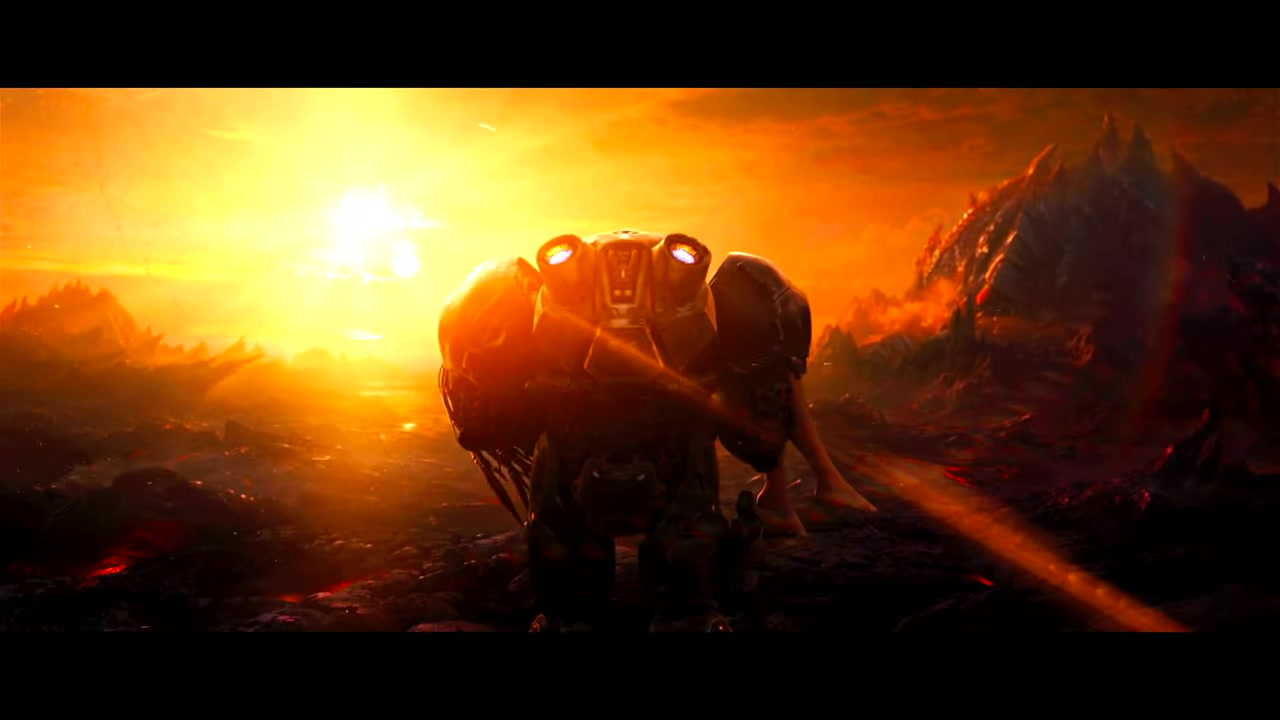

In [23]:
a

### 내가 하려는 것
- img를 불러와서 랜덤크롭해보기


In [ ]:
class ds(self, img, transform):
    def __init__():
        
    self.img = img
    self.transform = transform
    
    

In [25]:
tf = transforms.RandomCrop(100)

AttributeError: module 'torchvision.transforms' has no attribute 'randomcrop'

In [103]:
transform = transforms.Compose([
                transforms.RandomCrop(800)
                ])

In [104]:
transform(a)

ValueError: Required crop size (800, 800) is larger then input image size (720, 1280)